# Multiclass Classification with ANN & Optimizer Comparison



In this activity, we'll build and train a neural network on the Covertype dataset (Forest Cover Type Prediction). Our goal is to compare how different optimizers—SGD, Adam, and RMSprop—affect the model's training speed and accuracy.


In [ ]:
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Load dataset
X, y = fetch_covtype(return_X_y=True)
y = y - 1  # Convert to 0–6 for softmax

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert targets to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=7)
y_test_cat = to_categorical(y_test, num_classes=7)

We'll use a moderately deep feedforward network with ReLU activations and softmax output for multiclass prediction.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

def create_model():
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(7, activation='softmax')
    ])
    return model


In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

optimizers = {'SGD': SGD(), 'Adam': Adam(), 'RMSprop': RMSprop()}
histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name}")
    model = create_model()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(
        X_train, y_train_cat,
        validation_split=0.2,
        epochs=20,
        batch_size=1024,
        callbacks=[EarlyStopping(patience=3, restore_best_weights=True)],
        verbose=1
    )

    histories[name] = history


Training with SGD
Epoch 1/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5177 - loss: 1.3313 - val_accuracy: 0.6517 - val_loss: 0.8739
Epoch 2/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6629 - loss: 0.8340 - val_accuracy: 0.6949 - val_loss: 0.7504
Epoch 3/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7039 - loss: 0.7392 - val_accuracy: 0.7210 - val_loss: 0.7032
Epoch 4/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.7232 - loss: 0.6947 - val_accuracy: 0.7282 - val_loss: 0.6799
Epoch 5/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7300 - loss: 0.6742 - val_accuracy: 0.7321 - val_loss: 0.6647
Epoch 6/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7325 - loss: 0.6615 - val_accuracy: 0.7357 - val_loss: 0.6525
Epoch 7/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7366 - loss: 0.6503 - val_accuracy: 0.7380 - val_loss: 0.6427
Epoch 8/20
364/364 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7386 - loss: 0.6

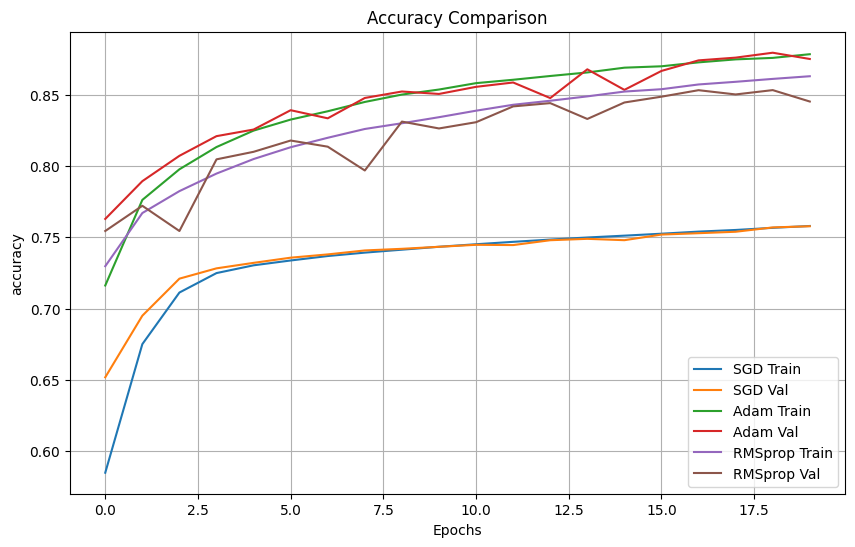

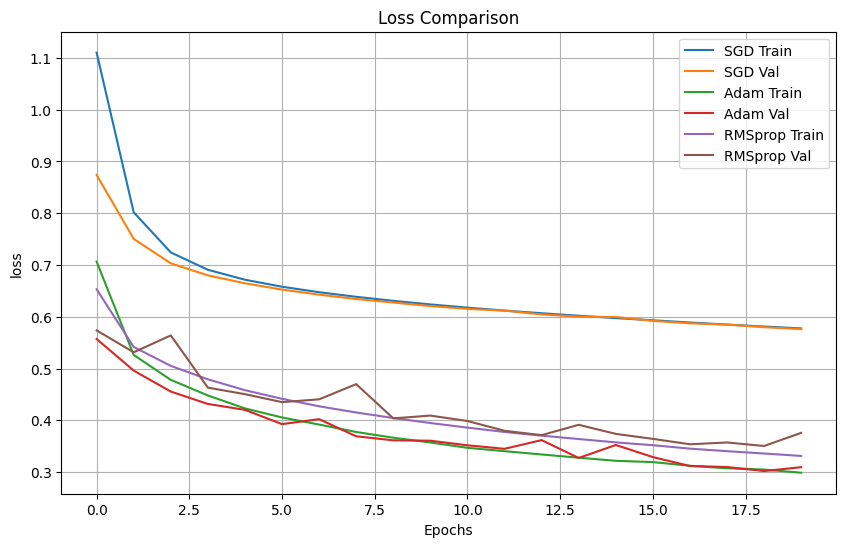

In [ ]:
def plot_metric(histories, metric):
    plt.figure(figsize=(10, 6))
    for name, history in histories.items():
        plt.plot(history.history[metric], label=f'{name} Train')
        plt.plot(history.history[f'val_{metric}'], label=f'{name} Val')
    plt.title(f'{metric.capitalize()} Comparison')
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    plt.legend()
    plt.grid(True)
    plt.show()

plot_metric(histories, 'accuracy')
plot_metric(histories, 'loss')

#### Summary:

- **Adam** typically converges faster and reaches higher accuracy.
- **SGD** may underperform without momentum or proper tuning.
- **RMSprop** often works well with noisy gradients.

Each optimizer has unique characteristics; the best choice depends on the problem, learning rate, and data shape.